In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
from scipy import linalg

import sys
sys.path.insert(0,'..')
import specsens as ss

thr 10407.3430801369
pfa 0.10000000000000053
pd 0.9577161904482208
roc 0.9577161904482208
thr 10405.26218860755
pfa 0.09999999999999998
pd 0.9563440357978729
roc 0.9563440357978729
num 895


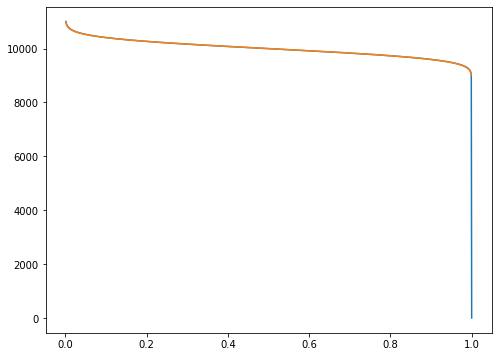

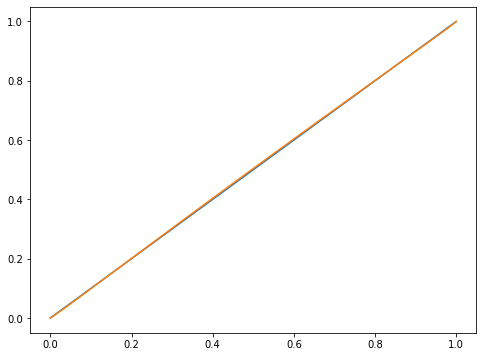

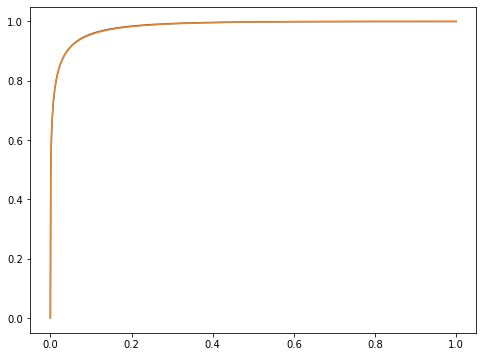

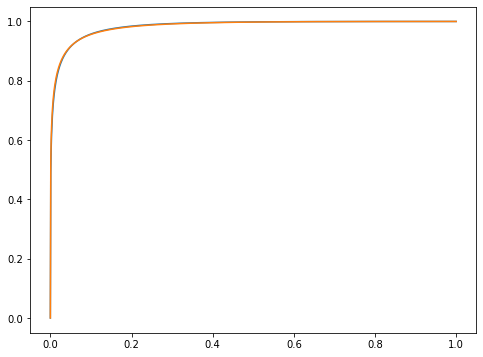

In [2]:
num_samples = 1000
noise_power = 10.
signal_power = 0.

### Chi2 stats numbers
thr = ss.chi2_stats.get_thr(noise_power=ss.util.dB_to_factor_power(noise_power),
                            pfa=0.1,
                            n=num_samples)
print(f'thr {thr}')

pfa = ss.chi2_stats.get_pfa(noise_power=ss.util.dB_to_factor_power(noise_power),
                            thr=thr,
                            n=num_samples)
print(f'pfa {pfa}')

pd = ss.chi2_stats.get_pd(noise_power=ss.util.dB_to_factor_power(noise_power),
                          signal_power=ss.util.dB_to_factor_power(signal_power),
                          thr=thr,
                          n=num_samples)
print(f'pd {pd}')

roc = ss.chi2_stats.get_roc(noise_power=ss.util.dB_to_factor_power(noise_power),
                          signal_power=ss.util.dB_to_factor_power(signal_power),
                          pfa=pfa,
                          n=num_samples)
print(f'roc {roc}')

### Clt stats numbers
thr = ss.clt_stats.get_thr(noise_power=ss.util.dB_to_factor_power(noise_power),
                            pfa=0.1,
                            n=num_samples)
print(f'thr {thr}')

pfa = ss.clt_stats.get_pfa(noise_power=ss.util.dB_to_factor_power(noise_power),
                            thr=thr,
                            n=num_samples)
print(f'pfa {pfa}')

pd = ss.clt_stats.get_pd(noise_power=ss.util.dB_to_factor_power(noise_power),
                          signal_power=ss.util.dB_to_factor_power(signal_power),
                          thr=thr,
                          n=num_samples)
print(f'pd {pd}')

roc = ss.clt_stats.get_roc(noise_power=ss.util.dB_to_factor_power(noise_power),
                          signal_power=ss.util.dB_to_factor_power(signal_power),
                          pfa=pfa,
                          n=num_samples)
print(f'roc {roc}')

num = ss.clt_stats.get_num(noise_power=ss.util.dB_to_factor_power(noise_power),
                          signal_power=ss.util.dB_to_factor_power(signal_power),
                          pfa=pfa,
                          pd=pd)
print(f'num {num}')


### Curves comparing chi2 and clt
pfa = np.linspace(0, 1, 1000)
thr = ss.chi2_stats.get_thr(noise_power=ss.util.dB_to_factor_power(noise_power),
                            pfa=pfa,
                            n=num_samples)
thr_clt = ss.clt_stats.get_thr(noise_power=ss.util.dB_to_factor_power(noise_power),
                            pfa=pfa,
                            n=num_samples)

plt.figure(figsize=(8, 6))
plt.plot(pfa, thr)
plt.plot(pfa, thr_clt)
plt.show()

pfa = ss.chi2_stats.get_pfa(noise_power=ss.util.dB_to_factor_power(noise_power),
                            thr=thr,
                            n=num_samples)
pfa_clt = ss.clt_stats.get_pfa(noise_power=ss.util.dB_to_factor_power(noise_power),
                            thr=thr,
                            n=num_samples)

plt.figure(figsize=(8, 6))
plt.plot(pfa, pfa)
plt.plot(pfa, pfa_clt)
plt.show()

pd = ss.chi2_stats.get_pd(noise_power=ss.util.dB_to_factor_power(noise_power),
                          signal_power=ss.util.dB_to_factor_power(signal_power),
                          thr=thr,
                          n=num_samples)
pd_clt = ss.clt_stats.get_pd(noise_power=ss.util.dB_to_factor_power(noise_power),
                          signal_power=ss.util.dB_to_factor_power(signal_power),
                          thr=thr,
                          n=num_samples)

plt.figure(figsize=(8, 6))
plt.plot(pfa, pd)
plt.plot(pfa, pd_clt)
plt.show()

roc = ss.chi2_stats.get_roc(noise_power=ss.util.dB_to_factor_power(noise_power),
                          signal_power=ss.util.dB_to_factor_power(signal_power),
                          pfa=pfa,
                          n=num_samples)
roc_clt = ss.clt_stats.get_roc(noise_power=ss.util.dB_to_factor_power(noise_power),
                          signal_power=ss.util.dB_to_factor_power(signal_power),
                          pfa=pfa,
                          n=num_samples)

plt.figure(figsize=(8, 6))
plt.plot(pfa, roc)
plt.plot(pfa, roc_clt)
plt.show()